### 데이터 시각화 관련 라이브러리 임포트

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#한글폰트 설정
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
#데이터 파일 불러오기 및 데이터 정보
total_df = pd.read_csv('data/datafile.csv', encoding='euc-kr')
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               420 non-null    int64  
 1   month              420 non-null    int64  
 2   city               420 non-null    object 
 3   dong               420 non-null    object 
 4   SO2(PPM)           420 non-null    float64
 5   NO2(PPM)           420 non-null    float64
 6   O3(PPM)            420 non-null    float64
 7   CO(PPM)            420 non-null    float64
 8   PM10(micrometer)   420 non-null    int64  
 9   PM2.5(micrometer)  420 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 32.9+ KB


In [4]:
# 불러온 데이터 확인
total_df

,year,month,city,dong,SO2(PPM),NO2(PPM),O3(PPM),CO(PPM),PM10(micrometer),PM2.5(micrometer)
0,2017,1,동구,서석동,0.001,0.003,0.019,0.7,46,30
1,2017,1,서구,농성동,0.002,0.007,0.021,0.7,45,31
2,2017,1,북구,두암동,0.001,0.005,0.023,0.6,51,32
3,2017,1,광산구,송정1동,0.002,0.004,0.019,0.6,35,24
4,2017,1,광산구,오선동,0.002,0.003,0.022,0.3,54,35
...,...,...,...,...,...,...,...,...,...,...
415,2021,12,북구,두암동,0.003,0.027,0.022,0.6,33,21
416,2021,12,광산구,송정1동,0.003,0.018,0.024,0.7,34,21
417,2021,12,광산구,오선동,0.003,0.016,0.023,0.4,30,22
418,2021,12,북구,건국동,0.003,0.029,0.017,0.6,38,26


In [5]:
# 데이터 연도별로 분할
y1, y2, y3, y4, y5=np.array_split(total_df, 5)

#### PPM단위와 ㎛단위가 다르기 때문에 구분하여 시각화 필요

#### 1)PPM단위 성분 데이터 가공
#### -연도별 특정 성분의 전체 측정값의 합계로 

In [6]:
#2017년 데이터 가공
df_so2_2017 = y1['SO2(PPM)'].values
df_no2_2017 = y1['NO2(PPM)'].values
df_o3_2017 = y1['O3(PPM)'].values
df_co_2017 = y1['CO(PPM)'].values

df_so2_2017 = np.sum(df_so2_2017)
df_no2_2017 = np.sum(df_no2_2017)
df_o3_2017 = np.sum(df_o3_2017)
df_co_2017 = np.sum(df_co_2017)


#2018년 데이터 가공
df_so2_2018 = y2['SO2(PPM)'].values
df_no2_2018 = y2['NO2(PPM)'].values
df_o3_2018 = y2['O3(PPM)'].values
df_co_2018 = y2['CO(PPM)'].values

df_so2_2018 = np.sum(df_so2_2018)
df_no2_2018 = np.sum(df_no2_2018)
df_o3_2018 = np.sum(df_o3_2018)
df_co_2018 = np.sum(df_co_2018)


#2019년 데이터 가공
df_so2_2019 = y3['SO2(PPM)'].values
df_no2_2019 = y3['NO2(PPM)'].values
df_o3_2019 = y3['O3(PPM)'].values
df_co_2019 = y3['CO(PPM)'].values

df_so2_2019 = np.sum(df_so2_2019)
df_no2_2019 = np.sum(df_no2_2019)
df_o3_2019 = np.sum(df_o3_2019)
df_co_2019 = np.sum(df_co_2019)


#2020년 데이터 가공
df_so2_2020 = y4['SO2(PPM)'].values
df_no2_2020 = y4['NO2(PPM)'].values
df_o3_2020 = y4['O3(PPM)'].values
df_co_2020 = y4['CO(PPM)'].values

df_so2_2020 = np.sum(df_so2_2020)
df_no2_2020 = np.sum(df_no2_2020)
df_o3_2020 = np.sum(df_o3_2020)
df_co_2020 = np.sum(df_co_2020)


#2021년 데이터 가공
df_so2_2021 = y5['SO2(PPM)'].values
df_no2_2021 = y5['NO2(PPM)'].values
df_o3_2021 = y5['O3(PPM)'].values
df_co_2021 = y5['CO(PPM)'].values

df_so2_2021 = np.sum(df_so2_2021)
df_no2_2021 = np.sum(df_no2_2021)
df_o3_2021 = np.sum(df_o3_2021)
df_co_2021 = np.sum(df_co_2021)


#가공한 데이터 담을 데이터프레임 생성
a = [df_so2_2017, df_so2_2018, df_so2_2019,
    df_so2_2020, df_so2_2021]
b = [df_no2_2017, df_no2_2018, df_no2_2019,
    df_no2_2020, df_no2_2021]
c = [df_o3_2017, df_o3_2018, df_o3_2019,
    df_o3_2020, df_o3_2021]
d = [df_co_2017, df_co_2018, df_co_2019,
    df_co_2020, df_co_2021]
year = ['2017', '2018', '2019', '2020', '2021']

ppm_data_set = pd.DataFrame({'SO2(PPM)' : a, 'NO2(PPM)' : b, 'O3(PPM)' : c, 'CO(PPM)' : d}, index = year)

In [7]:
# 데이터 프레임 생성 확인
ppm_data_set

,SO2(PPM),NO2(PPM),O3(PPM),CO(PPM)
2017,0.195,1.447,2.551,36.1
2018,0.212,1.455,2.320,42.8
2019,0.223,1.505,2.505,36.9
2020,0.228,1.255,2.407,34.0
2021,0.240,1.193,2.657,41.6


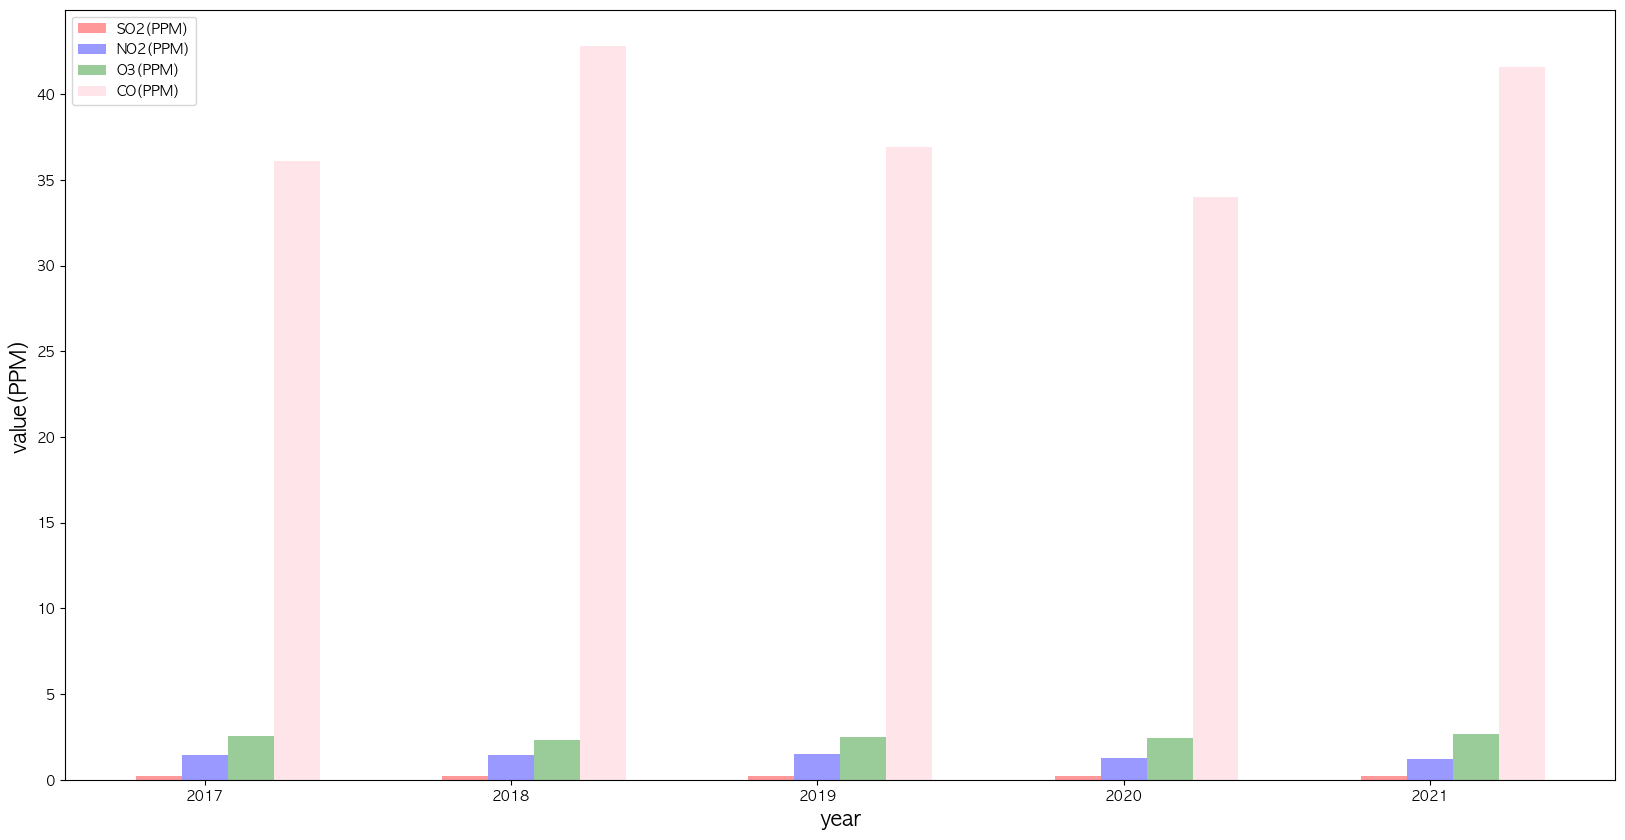

In [8]:
# ppm성분 수치관련 통계
fig, ax = plt.subplots(figsize=(20,10))
bar_width = 0.15
index = np.arange(5)
year = [2017, 2018, 2019, 2020, 2021]
b1 = plt.bar(index, ppm_data_set['SO2(PPM)'], bar_width, alpha=0.4, color='red', label='SO2(PPM)')

b2 = plt.bar(index + bar_width, ppm_data_set['NO2(PPM)'], bar_width, alpha=0.4, color='blue', label='NO2(PPM)')

b3 = plt.bar(index + 2 * bar_width, ppm_data_set['O3(PPM)'], bar_width, alpha=0.4, color='green', label='O3(PPM)')

b4 = plt.bar(index + 3 * bar_width, ppm_data_set['CO(PPM)'], bar_width, alpha=0.4, color='pink', label='CO(PPM)')

plt.xticks(np.arange(bar_width, 5 + bar_width, 1), year)

# x축, y축 이름 및 범례 설정
plt.xlabel('year', size = 15)
plt.ylabel('value(PPM)', size = 15)
plt.legend(loc='best')
plt.show()

#### 통계 결과
#### SO2, NO2, O3의 측정값은 연도별로 대체적으로 측정값이 동일하지만, 
#### CO성분의 측정값은 연도별로 일정하지 않다는 것을 알 수 있습니다.
#### CO성분과 비교하여 나머지 측정값이 차이 폭이 커서 정확한 수치를 알 수 없기 때문에 
#### 범위를 줄인 추가적인 그래프가 필요합니다

In [9]:
# ppm성분의 SO2, NO2, O3의 꺾은선 그래프와 막대 그래프를 그리기 위한 데이터프레임 생성
ppm_data_set_re = ppm_data_set.drop('CO(PPM)', axis=1)
ppm_data_set_re

,SO2(PPM),NO2(PPM),O3(PPM)
2017,0.195,1.447,2.551
2018,0.212,1.455,2.320
2019,0.223,1.505,2.505
2020,0.228,1.255,2.407
2021,0.240,1.193,2.657


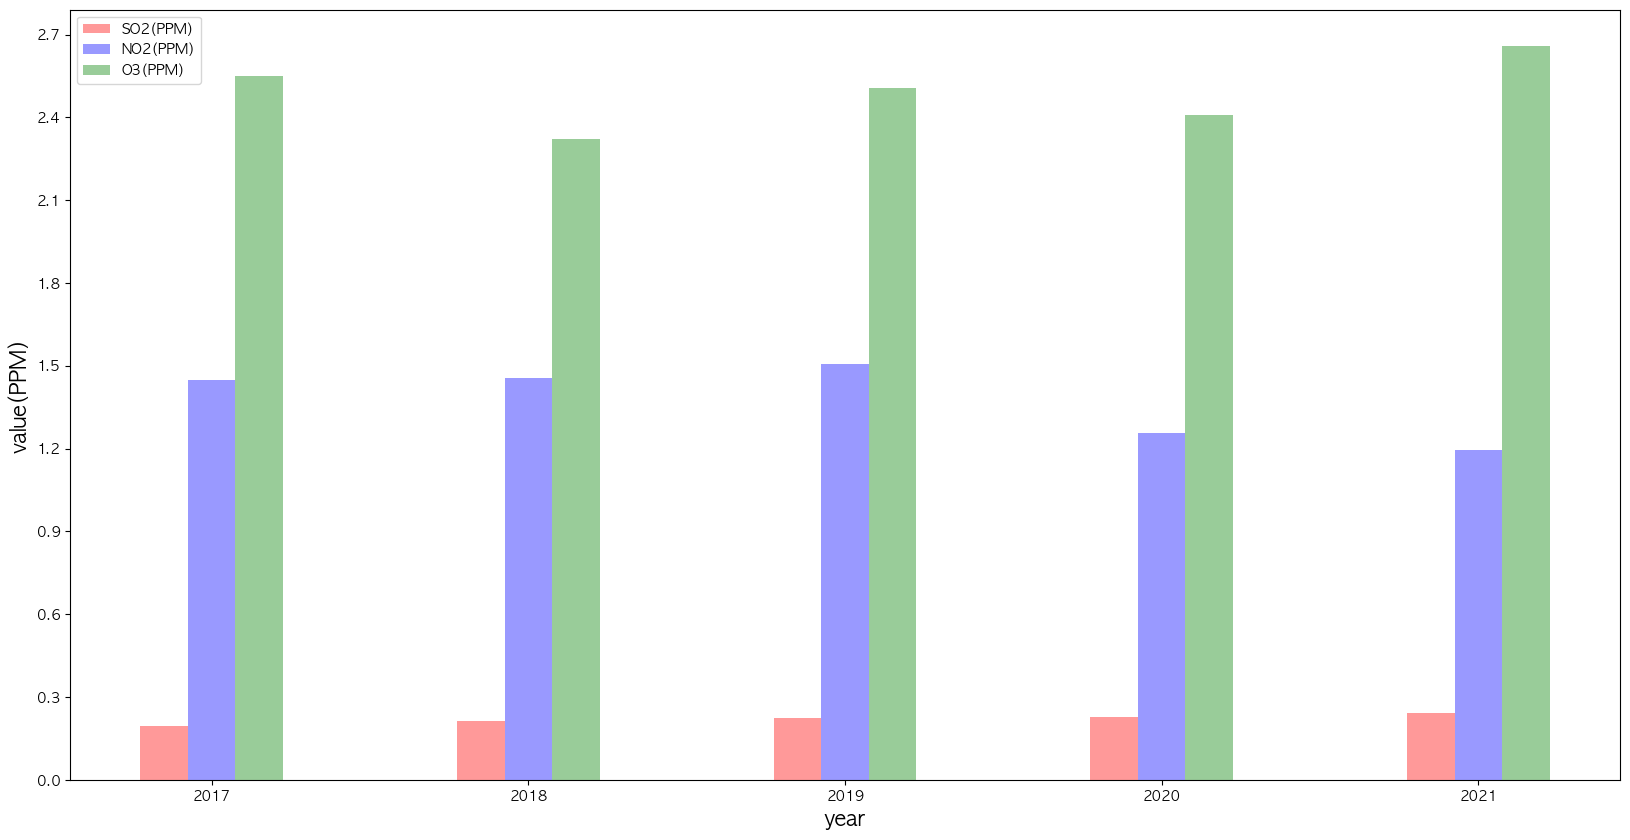

In [10]:
# ppm측정단위의 SO2, NO2, O3의 막대 그래프
fig, ax = plt.subplots(figsize=(20,10))
bar_width = 0.15
index = np.arange(5)
year = [2017, 2018, 2019, 2020, 2021]

# 막대 그래프 그리기
b1 = plt.bar(index, ppm_data_set_re['SO2(PPM)'], bar_width, alpha=0.4, color='red', label='SO2(PPM)')

b2 = plt.bar(index + bar_width, ppm_data_set_re['NO2(PPM)'], bar_width, alpha=0.4, color='blue', label='NO2(PPM)')

b3 = plt.bar(index + 2 * bar_width, ppm_data_set_re['O3(PPM)'], bar_width, alpha=0.4, color='green', 
             label='O3(PPM)')

plt.xticks(np.arange(bar_width, 5 + bar_width, 1), year)
plt.yticks(np.arange(0, 3, 0.3))

# x축, y축 이름 및 범례 설정
plt.xlabel('year', size = 15)
plt.ylabel('value(PPM)', size = 15)
plt.legend(loc='best')
plt.show()

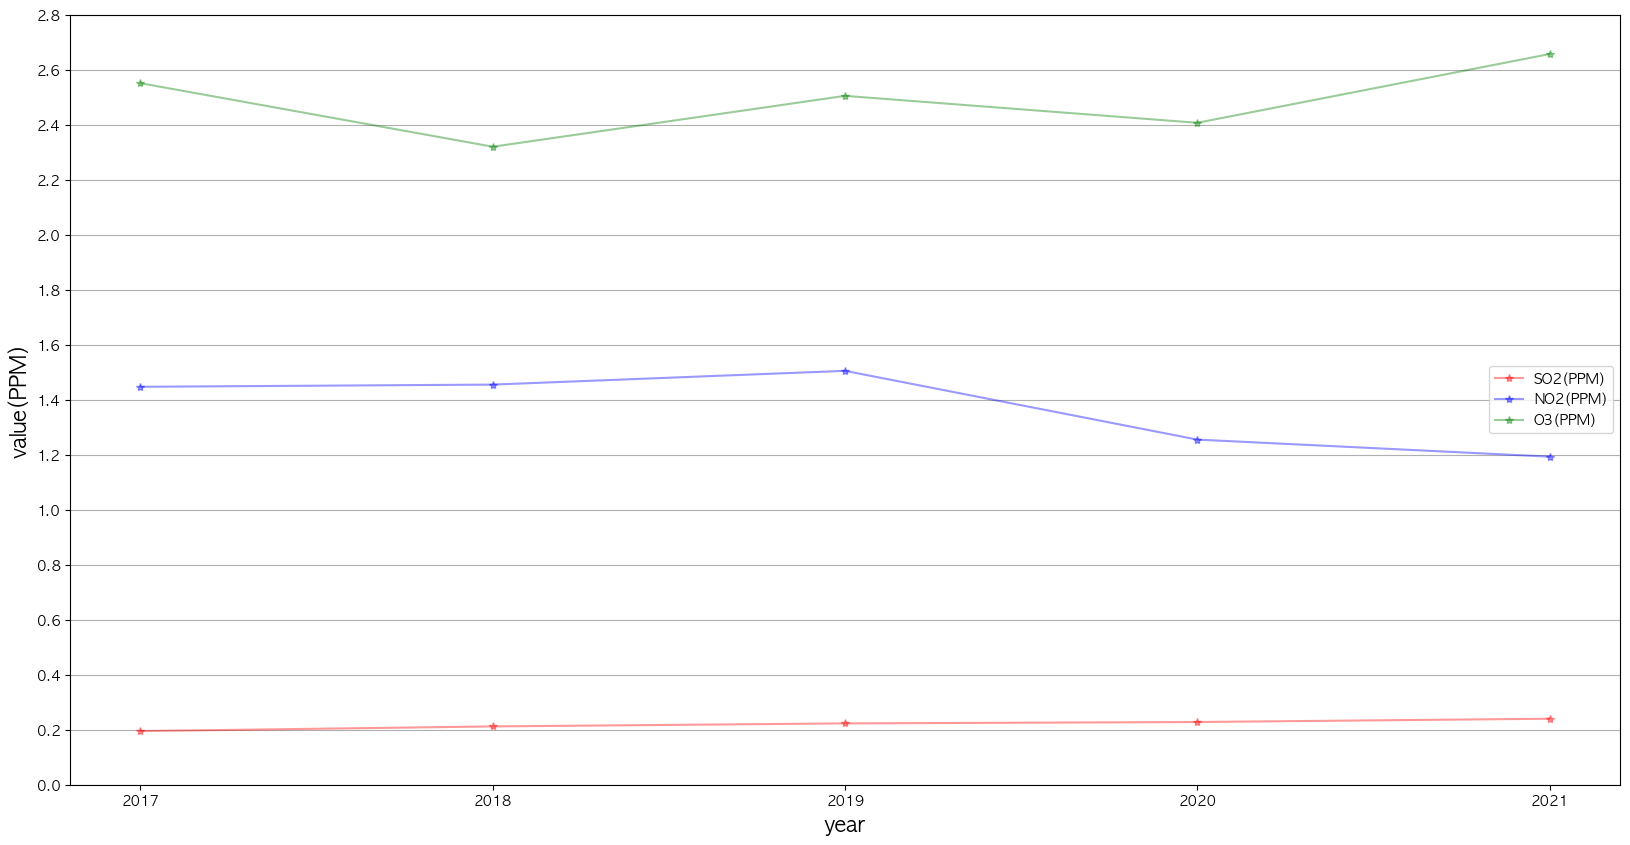

In [11]:
# ppm측정단위의 SO2, NO2, O3의 꺾은선 그래프
fig, ax = plt.subplots(figsize=(20,10))

year = [2017, 2018, 2019, 2020, 2021]
plt.plot(year, ppm_data_set_re['SO2(PPM)'], marker='*', alpha=0.4, color='red', label='SO2(PPM)')

plt.plot(year, ppm_data_set_re['NO2(PPM)'], marker='*', alpha=0.4, color='blue', label='NO2(PPM)')

plt.plot(year, ppm_data_set_re['O3(PPM)'], marker='*', alpha=0.4, color='green', label='O3(PPM)')

plt.xticks(year)
plt.yticks(np.arange(0, 3, 0.2))

# x축, y축 이름 및 범례 설정
plt.grid(True, axis='y')
plt.xlabel('year', size = 15)
plt.ylabel('value(PPM)', size = 15)
plt.legend(loc='best')
plt.show()

#### 통계 결과
#### SO2측정값은 꾸준히 증가, NO2측정값은 2019년도에 높게 측정되었다가 감소하는 추세입니다.
#### 또한 O3측정값은 증가와 감소가 계속 반복되게 측정된 것을 알 수 있습니다

#### 2)㎛단위 성분 데이터 가공

In [12]:
#2017년 데이터 가공
df_pm1_2017 = y1['PM10(micrometer)'].values
df_pm2_2017 = y1['PM2.5(micrometer)'].values

df_pm1_2017 = np.sum(df_pm1_2017)
df_pm2_2017 = np.sum(df_pm2_2017)

#2018년 데이터 가공
df_pm1_2018 = y2['PM10(micrometer)'].values
df_pm2_2018 = y2['PM2.5(micrometer)'].values

df_pm1_2018 = np.sum(df_pm1_2018)
df_pm2_2018 = np.sum(df_pm2_2018)

#2019년 데이터 가공
df_pm1_2019 = y3['PM10(micrometer)'].values
df_pm2_2019 = y3['PM2.5(micrometer)'].values

df_pm1_2019 = np.sum(df_pm1_2019)
df_pm2_2019 = np.sum(df_pm2_2019)

#2020년 데이터 가공
df_pm1_2020 = y4['PM10(micrometer)'].values
df_pm2_2020 = y4['PM2.5(micrometer)'].values

df_pm1_2020 = np.sum(df_pm1_2020)
df_pm2_2020 = np.sum(df_pm2_2020)

#2021년 데이터 가공
df_pm1_2021 = y5['PM10(micrometer)'].values
df_pm2_2021 = y5['PM2.5(micrometer)'].values

df_pm1_2021 = np.sum(df_pm1_2021)
df_pm2_2021 = np.sum(df_pm2_2021)

#가공한 데이터 담을 데이터프레임 생성
e = [df_pm1_2017, df_pm1_2018, df_pm1_2019,
    df_pm1_2020, df_pm1_2021]
f = [df_pm2_2017, df_pm2_2018, df_pm2_2019,
    df_pm2_2020, df_pm2_2021]
year = ['2017', '2018', '2019', '2020', '2021']

pm_data_set = pd.DataFrame({'PM10(micrometer)' : e, 'PM2.5(micrometer)' : f}, index = year)

In [13]:
#데이터 프레임 생성 확인
pm_data_set

,PM10(micrometer),PM2.5(micrometer)
2017,3392,1992
2018,3447,1998
2019,8184,1976
2020,2495,1469
2021,2641,1449


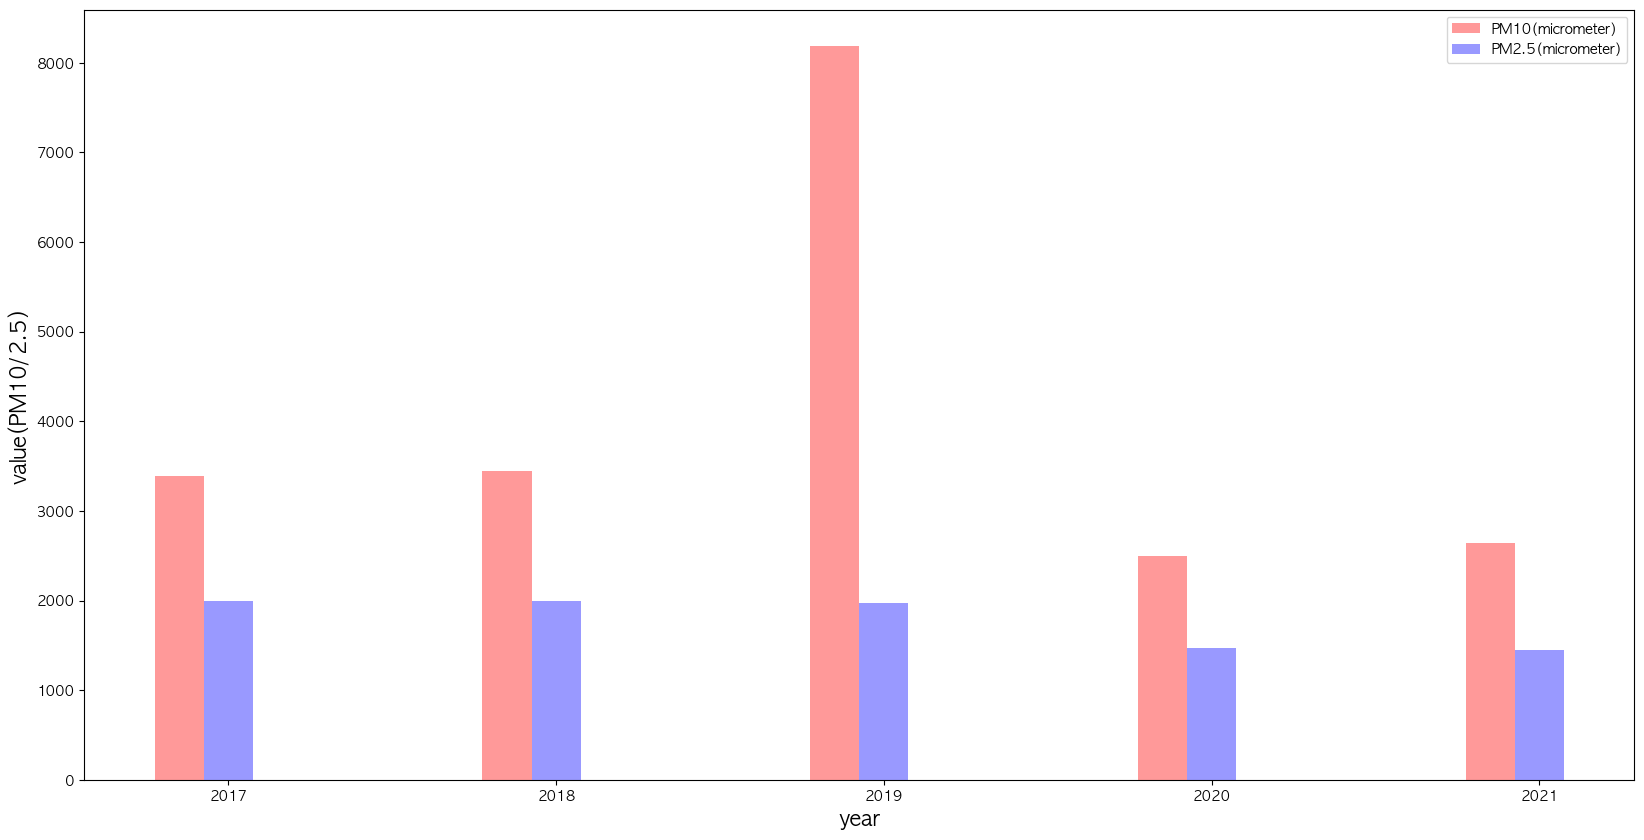

In [14]:
# ㎛단위 수치관련 통계
fig, ax = plt.subplots(figsize=(20,10))
bar_width = 0.15
index = np.arange(5)
year = [2017, 2018, 2019, 2020, 2021]
b1 = plt.bar(index, pm_data_set['PM10(micrometer)'], 
             bar_width, alpha=0.4, color='red', label='PM10(micrometer)')

b2 = plt.bar(index + bar_width, pm_data_set['PM2.5(micrometer)'], 
             bar_width, alpha=0.4, color='blue', label='PM2.5(micrometer)')

plt.xticks(np.arange(bar_width, 5 + bar_width, 1), year)

# x축, y축 이름 및 범례 설정
plt.xlabel('year', size = 15)
plt.ylabel('value(PM10/2.5)', size = 15)
plt.legend()
plt.show()

#### -2019년도의 미세먼지 수치만 높기 때문에 나머지 연도에 대한 그래프 추가

In [15]:
pm_data_set_re = pm_data_set.drop('2019')

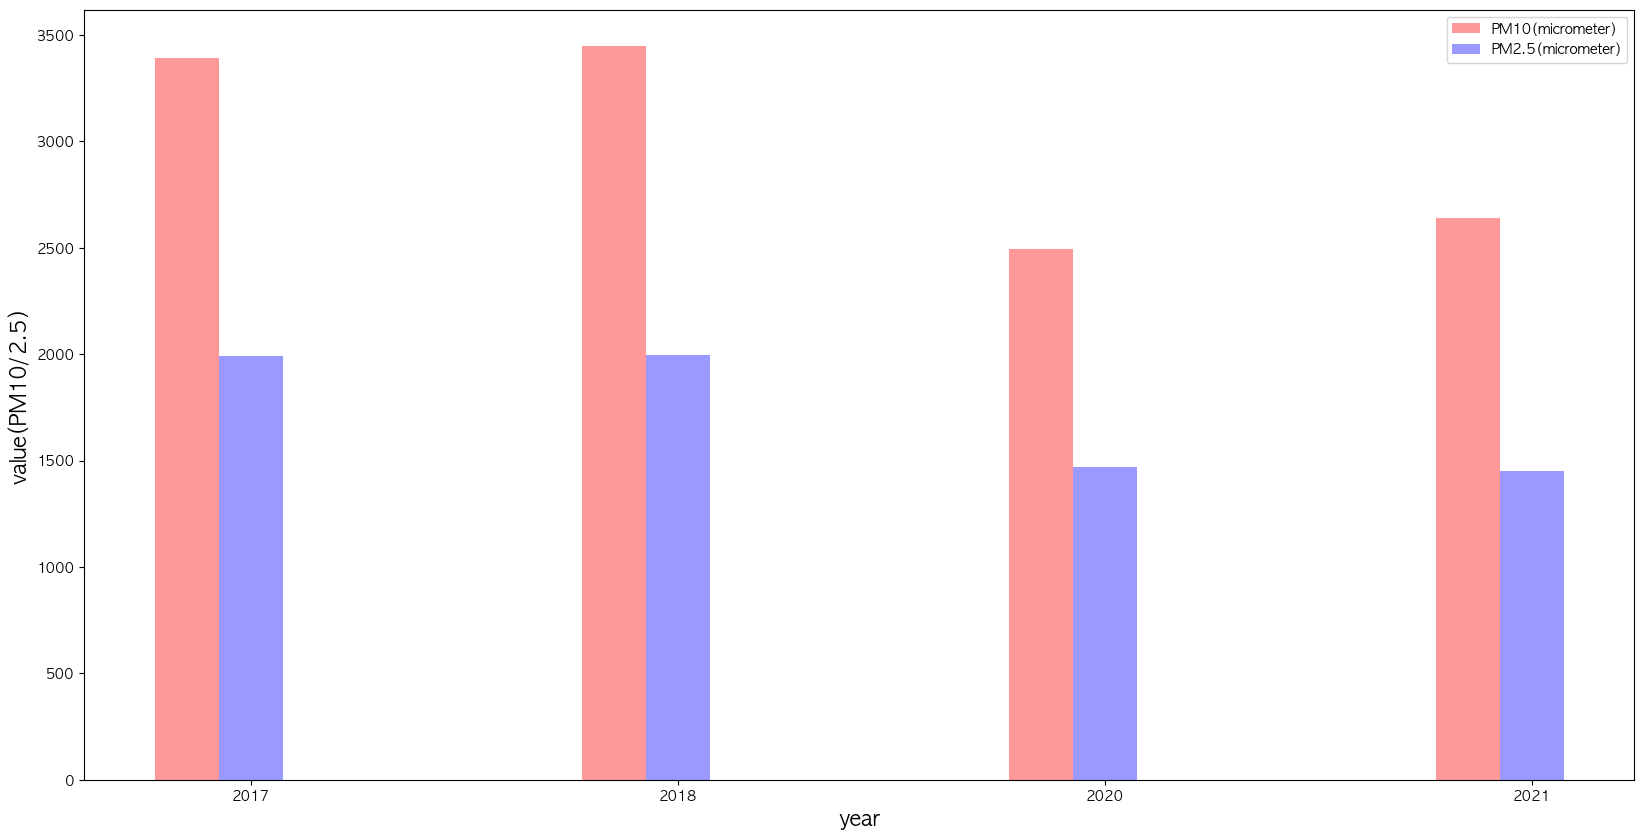

In [16]:
# ㎛단위 수치관련 통계(2019년 제외)
fig, ax = plt.subplots(figsize=(20,10))
bar_width = 0.15
index = np.arange(4)
year_re = [2017, 2018, 2020, 2021]
b1 = plt.bar(index, pm_data_set_re['PM10(micrometer)'], 
             bar_width, alpha=0.4, color='red', label='PM10(micrometer)')

b2 = plt.bar(index + bar_width, pm_data_set_re['PM2.5(micrometer)'], 
             bar_width, alpha=0.4, color='blue', label='PM2.5(micrometer)')

plt.xticks(np.arange(bar_width, 4 + bar_width, 1), year_re)

# x축, y축 이름 및 범례 설정
plt.xlabel('year', size = 15)
plt.ylabel('value(PM10/2.5)', size = 15)
plt.legend()
plt.show()

In [17]:
pm_data_set_re['PM10(micrometer)']

2017    3392
2018    3447
2020    2495
2021    2641
Name: PM10(micrometer), dtype: int64

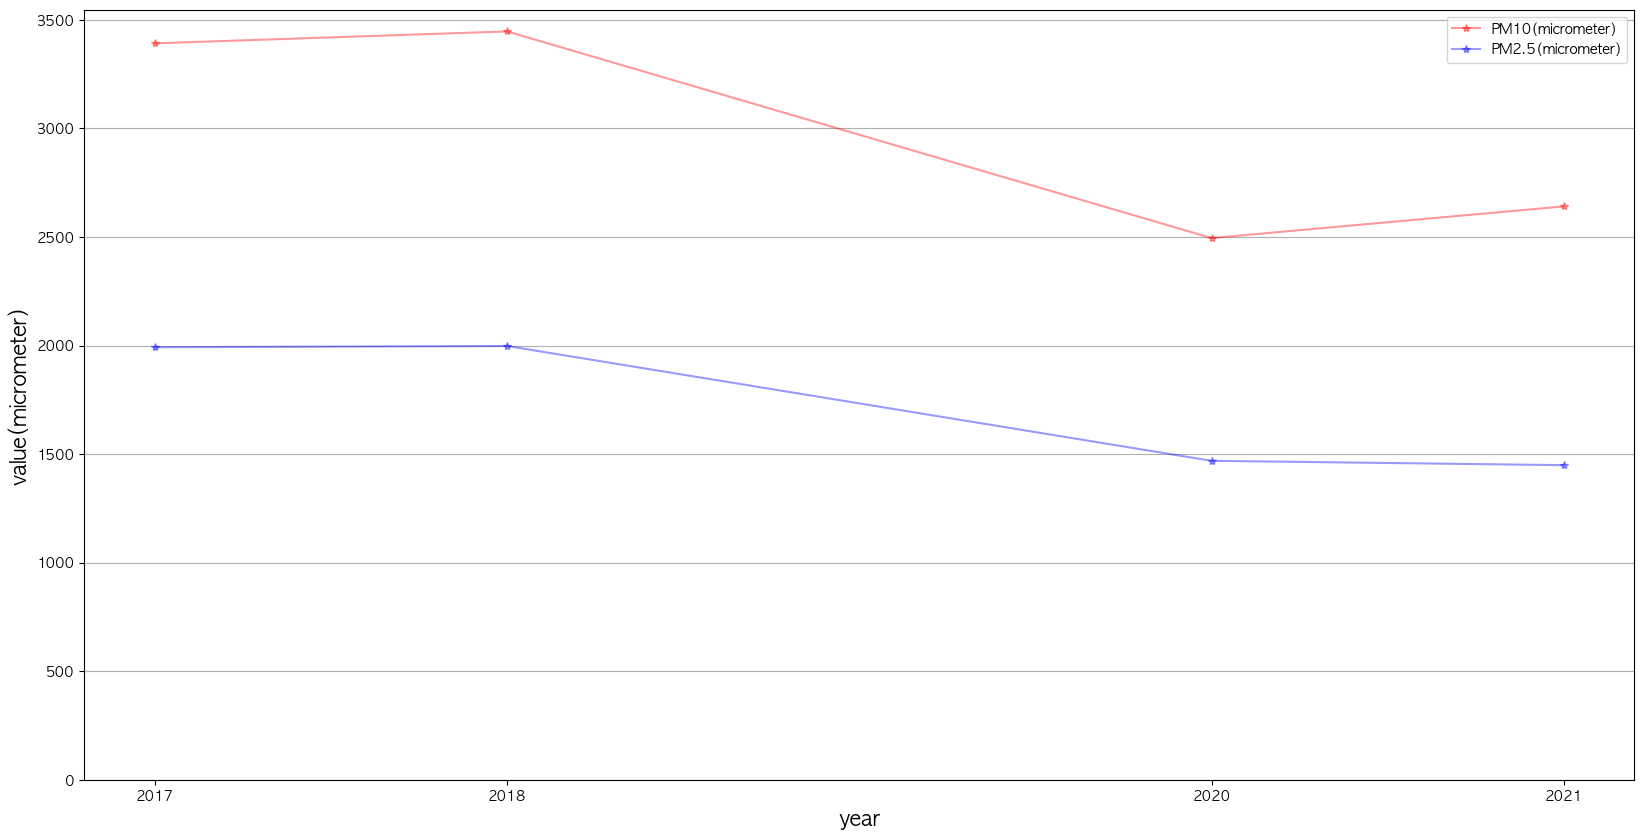

In [18]:
# pm측정단위의 2017, 2018, 2020, 2021연도의 꺾은선 그래프
fig, ax = plt.subplots(figsize=(20,10))
bar_width = 0.15
index = np.arange(4)
year_re = [2017, 2018, 2020, 2021]
plt.plot(year_re, pm_data_set_re['PM10(micrometer)'], marker='*', alpha=0.4, color='red', label='PM10(micrometer)')

plt.plot(year_re, pm_data_set_re['PM2.5(micrometer)'], marker='*', alpha=0.4, color='blue', label='PM2.5(micrometer)')

plt.xticks(year_re)
plt.yticks(np.arange(0, 4000, 500))

# x축, y축 이름 및 범례 설정
plt.grid(True, axis='y')
plt.xlabel('year', size = 15)
plt.ylabel('value(micrometer)', size = 15)
plt.legend(loc='best')
plt.show()

#### 통계 결과
#### 2019년을 제외한 나머지 연도에 대해서는 대체적으로 측정값이 점점 낮아지는 것을 알 수 있습니다
#### ㎛단위의 전체 데이터인 월별 측정값을 추출하여 어느 월, 어느 지역에 가장 미세먼지와 초미세먼지가 높게 측정되었는지 알아보자

In [19]:
y3_pm_data_set = y3.loc[:,['month', 'city', 'dong', 'PM10(micrometer)', 'PM2.5(micrometer)']]

In [20]:
##y3_pm_totalC_data_set = y3_pm_data_set

#2019년 1월 미세먼지/초미세먼지 데이터
y3_pm10_1m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 1]['PM10(micrometer)'].sum()
y3_pm2_1m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 1]['PM2.5(micrometer)'].sum()

#2019년 2월 미세먼지/초미세먼지 데이터
y3_pm10_2m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 2]['PM10(micrometer)'].sum()
y3_pm2_2m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 2]['PM2.5(micrometer)'].sum()

#2019년 3월 미세먼지/초미세먼지 데이터
y3_pm10_3m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 3]['PM10(micrometer)'].sum()
y3_pm2_3m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 3]['PM2.5(micrometer)'].sum()

#2019년 4월 미세먼지/초미세먼지 데이터
y3_pm10_4m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 4]['PM10(micrometer)'].sum()
y3_pm2_4m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 4]['PM2.5(micrometer)'].sum()

#2019년 5월 미세먼지/초미세먼지 데이터
y3_pm10_5m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 5]['PM10(micrometer)'].sum()
y3_pm2_5m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 5]['PM2.5(micrometer)'].sum()

#2019년 6월 미세먼지/초미세먼지 데이터
y3_pm10_6m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 6]['PM10(micrometer)'].sum()
y3_pm2_6m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 6]['PM2.5(micrometer)'].sum()

#2019년 7월 미세먼지/초미세먼지 데이터
y3_pm10_7m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 7]['PM10(micrometer)'].sum()
y3_pm2_7m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 7]['PM2.5(micrometer)'].sum()

#2019년 8월 미세먼지/초미세먼지 데이터
y3_pm10_8m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 8]['PM10(micrometer)'].sum()
y3_pm2_8m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 8]['PM2.5(micrometer)'].sum()

#2019년 9월 미세먼지/초미세먼지 데이터
y3_pm10_9m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 9]['PM10(micrometer)'].sum()
y3_pm2_9m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 9]['PM2.5(micrometer)'].sum()

#2019년 10월 미세먼지/초미세먼지 데이터
y3_pm10_10m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 10]['PM10(micrometer)'].sum()
y3_pm2_10m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 10]['PM2.5(micrometer)'].sum()

#2019년 11월 미세먼지/초미세먼지 데이터
y3_pm10_11m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 11]['PM10(micrometer)'].sum()
y3_pm2_11m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 11]['PM2.5(micrometer)'].sum()

#2019년 12월 미세먼지/초미세먼지 데이터
y3_pm10_12m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 12]['PM10(micrometer)'].sum()
y3_pm2_12m_data_set = y3_pm_data_set[y3_pm_data_set['month'] == 12]['PM2.5(micrometer)'].sum()

# 2019년 월 통합 미세먼지/초미세먼지 데이터프레임 생성
g = [y3_pm10_1m_data_set, y3_pm10_2m_data_set, y3_pm10_3m_data_set, y3_pm10_4m_data_set, y3_pm10_5m_data_set,
    y3_pm10_6m_data_set, y3_pm10_7m_data_set, y3_pm10_8m_data_set, y3_pm10_9m_data_set, y3_pm10_10m_data_set,
    y3_pm10_11m_data_set, y3_pm10_12m_data_set]

h = [y3_pm2_1m_data_set, y3_pm2_2m_data_set, y3_pm2_3m_data_set, y3_pm2_4m_data_set, y3_pm2_5m_data_set,
    y3_pm2_6m_data_set, y3_pm2_7m_data_set, y3_pm2_8m_data_set, y3_pm2_9m_data_set, y3_pm2_10m_data_set,
    y3_pm2_11m_data_set, y3_pm2_12m_data_set]

month_y3 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December']

y3_pm10_pm2_data_set = pd.DataFrame({'PM10(micrometer)' : g, 'PM2.5(micrometer)' : h}, index = month_y3)

In [21]:
y3_pm10_pm2_data_set

,PM10(micrometer),PM2.5(micrometer)
January,368,228
February,396,240
March,5104,273
April,304,141
May,351,157
June,281,175
July,200,118
August,220,120
September,189,104
October,244,123


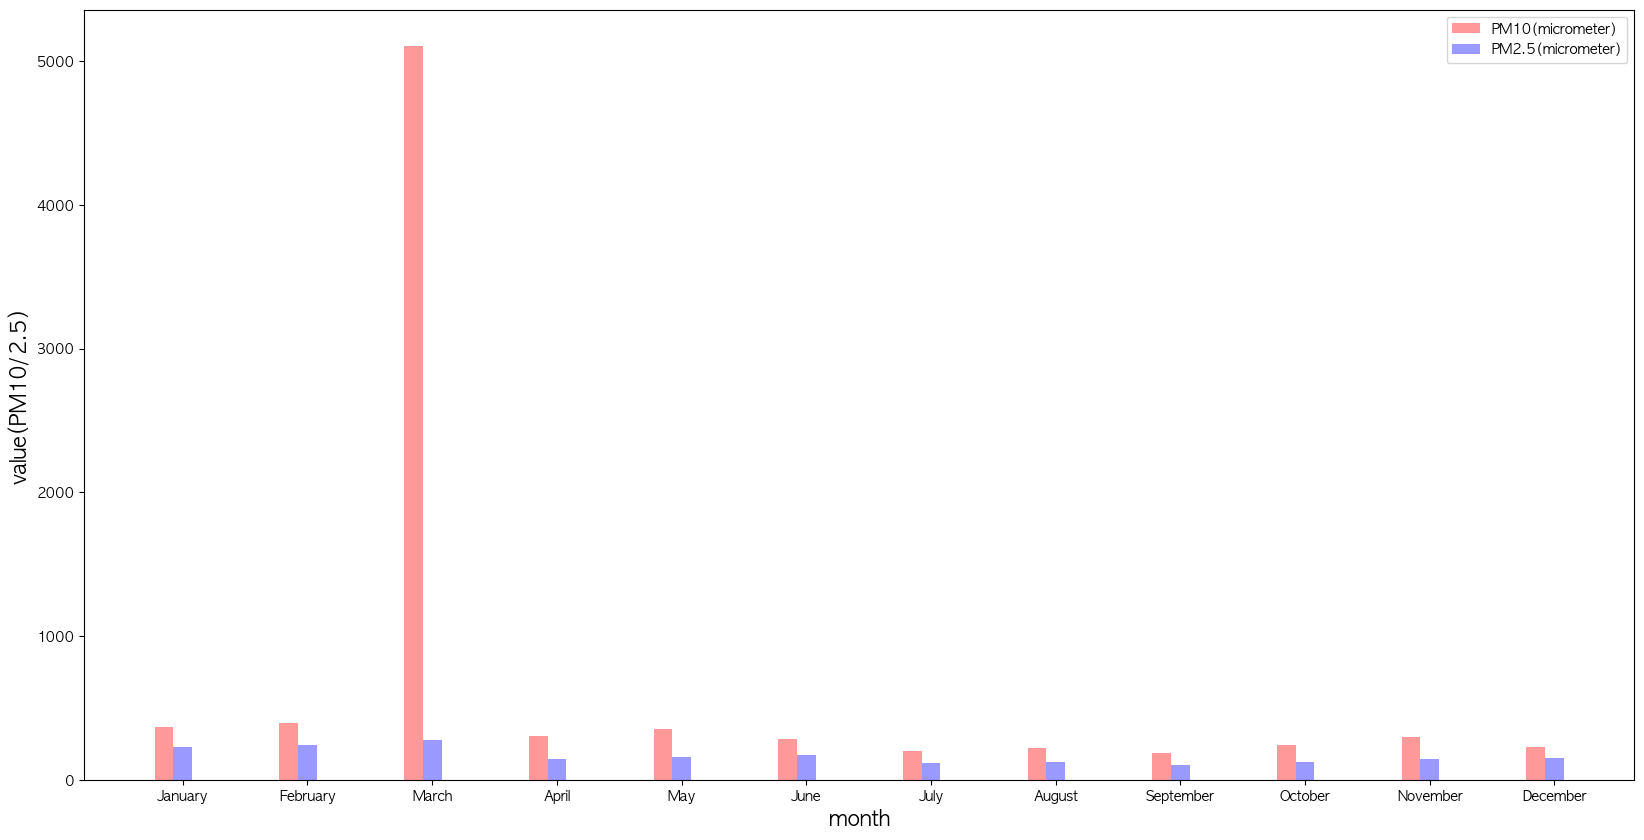

In [22]:
# ㎛단위 수치관련 통계(월 기준)
fig, ax = plt.subplots(figsize=(20,10))
bar_width = 0.15
index = np.arange(12)
b1 = plt.bar(index, y3_pm10_pm2_data_set['PM10(micrometer)'], 
             bar_width, alpha=0.4, color='red', label='PM10(micrometer)')

b2 = plt.bar(index + bar_width, y3_pm10_pm2_data_set['PM2.5(micrometer)'], 
             bar_width, alpha=0.4, color='blue', label='PM2.5(micrometer)')

plt.xticks(np.arange(bar_width, 12 + bar_width, 1), month_y3)

# x축, y축 이름 및 범례 설정
plt.xlabel('month', size = 15)
plt.ylabel('value(PM10/2.5)', size = 15)
plt.legend()
plt.show()

#### 3월에 가장 높은 수치를 보이는 것을 알 수 있습니다

In [23]:
y3_pm_data_set_co = y3_pm_data_set

y3_pm_data_set_co.set_index('month', inplace=True)
y3_pm_data_set_co = y3_pm_data_set_co.loc[3]

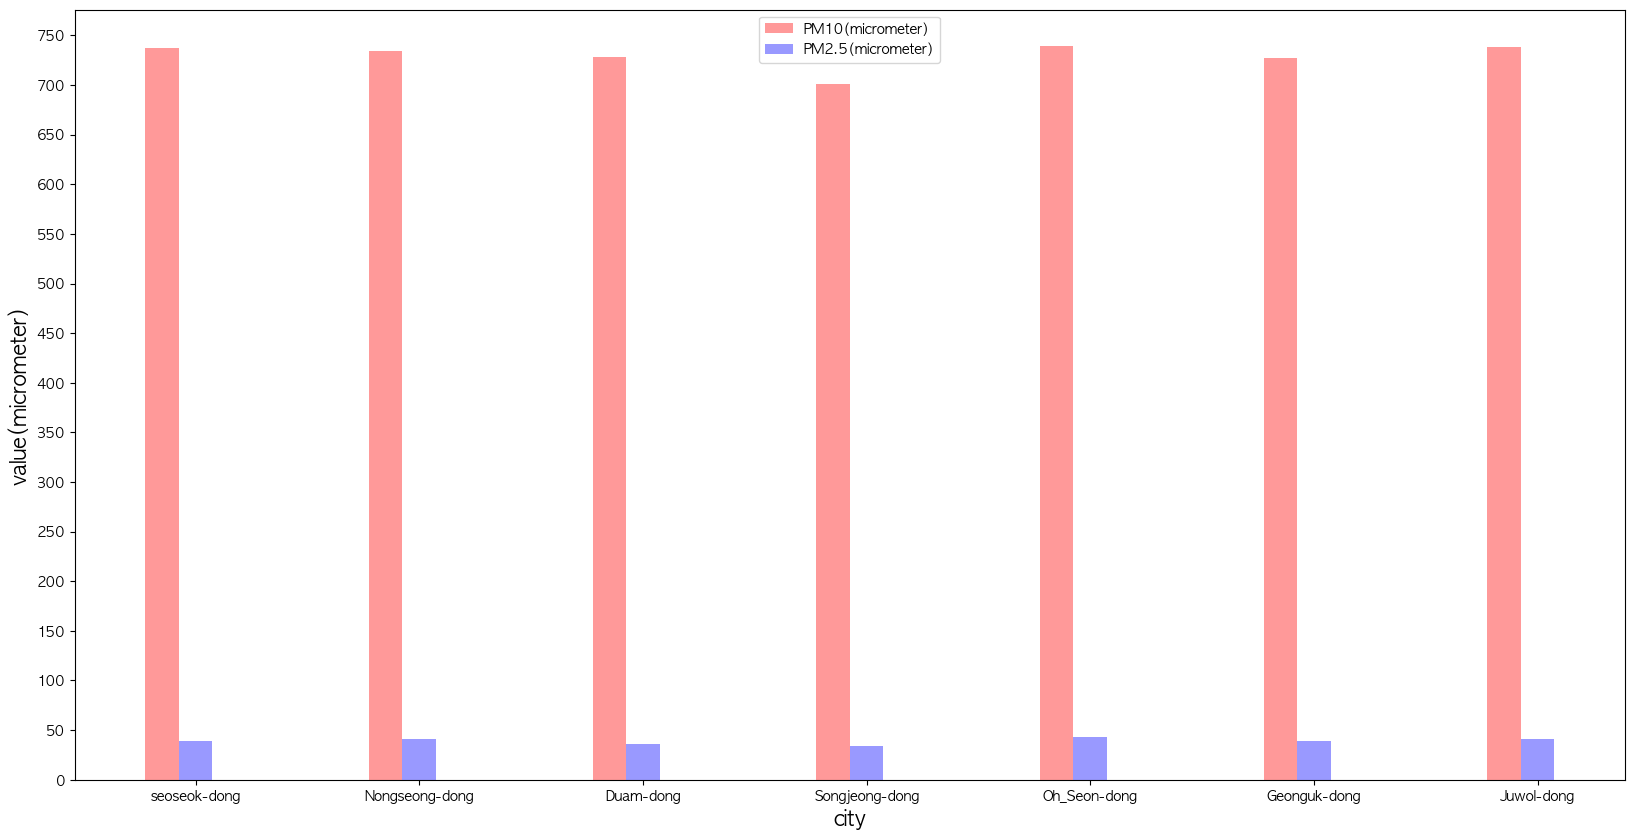

In [24]:
# ㎛단위 수치관련 통계(2019년 3월 광주 내 지역별)
fig, ax = plt.subplots(figsize=(20,10))
bar_width = 0.15
index = np.arange(7)
city = ['seoseok-dong', 'Nongseong-dong', 'Duam-dong', 'Songjeong-dong', 'Oh_Seon-dong', 
        'Geonguk-dong', 'Juwol-dong']
b1 = plt.bar(index, y3_pm_data_set_co['PM10(micrometer)'], 
             bar_width, alpha=0.4, color='red', label='PM10(micrometer)')

b2 = plt.bar(index + bar_width, y3_pm_data_set_co['PM2.5(micrometer)'], 
             bar_width, alpha=0.4, color='blue', label='PM2.5(micrometer)')

plt.xticks(np.arange(bar_width, 7 + bar_width, 1), city)
plt.yticks(np.arange(0, 800, 50))

# x축, y축 이름 및 범례 설정
plt.xlabel('city', size = 15)
plt.ylabel('value(micrometer)', size = 15)
plt.legend()
plt.show()

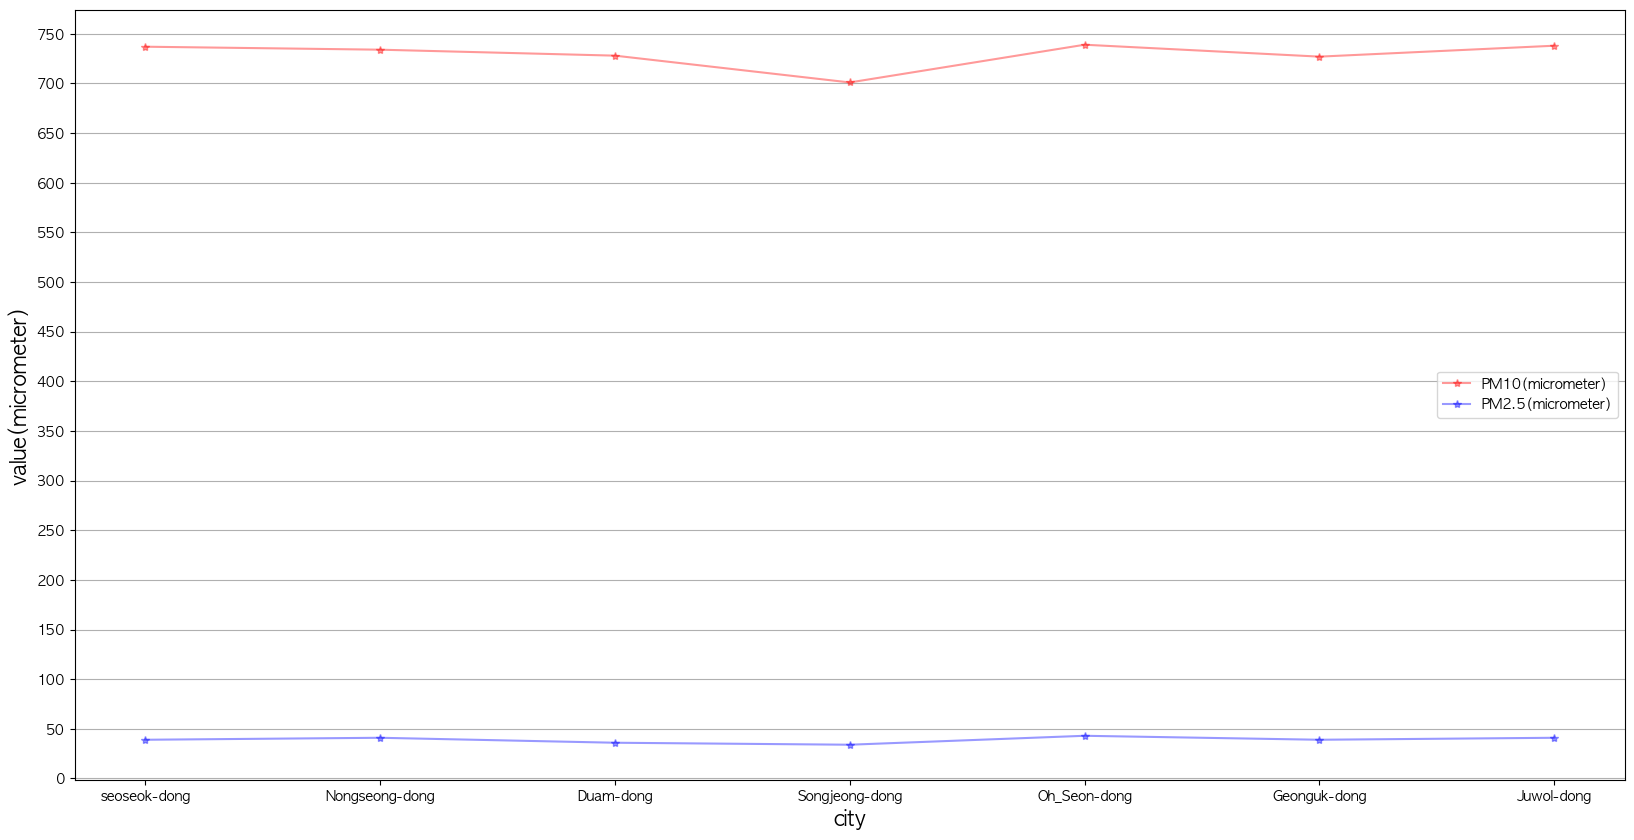

In [25]:
# y1_pm_data_set
fig, ax = plt.subplots(figsize=(20,10))
bar_width = 0.15
index = np.arange(7)
city = ['seoseok-dong', 'Nongseong-dong', 'Duam-dong', 'Songjeong-dong', 'Oh_Seon-dong', 
        'Geonguk-dong', 'Juwol-dong']
plt.plot(city, y3_pm_data_set_co['PM10(micrometer)'], marker='*', alpha=0.4, color='red', label='PM10(micrometer)')

plt.plot(city, y3_pm_data_set_co['PM2.5(micrometer)'], marker='*', alpha=0.4, color='blue', label='PM2.5(micrometer)')

plt.xticks(city)
plt.yticks(np.arange(0, 800, 50))

# x축, y축 이름 및 범례 설정
plt.grid(True, axis='y')
plt.xlabel('city', size = 15)
plt.ylabel('value(micrometer)', size = 15)
plt.legend(loc='best')
plt.show()

#### PM10과 PM2.5 측정값의 차이가 심해 제대로 확인이 어렵기 때문에 개별적인 시각화 필요

In [26]:
y3_pm_data_set_2 = y3_pm_data_set_co.drop('PM10(micrometer)', axis=1)

In [27]:
y3_pm_data_set_1 = y3_pm_data_set_co.drop('PM2.5(micrometer)', axis=1)

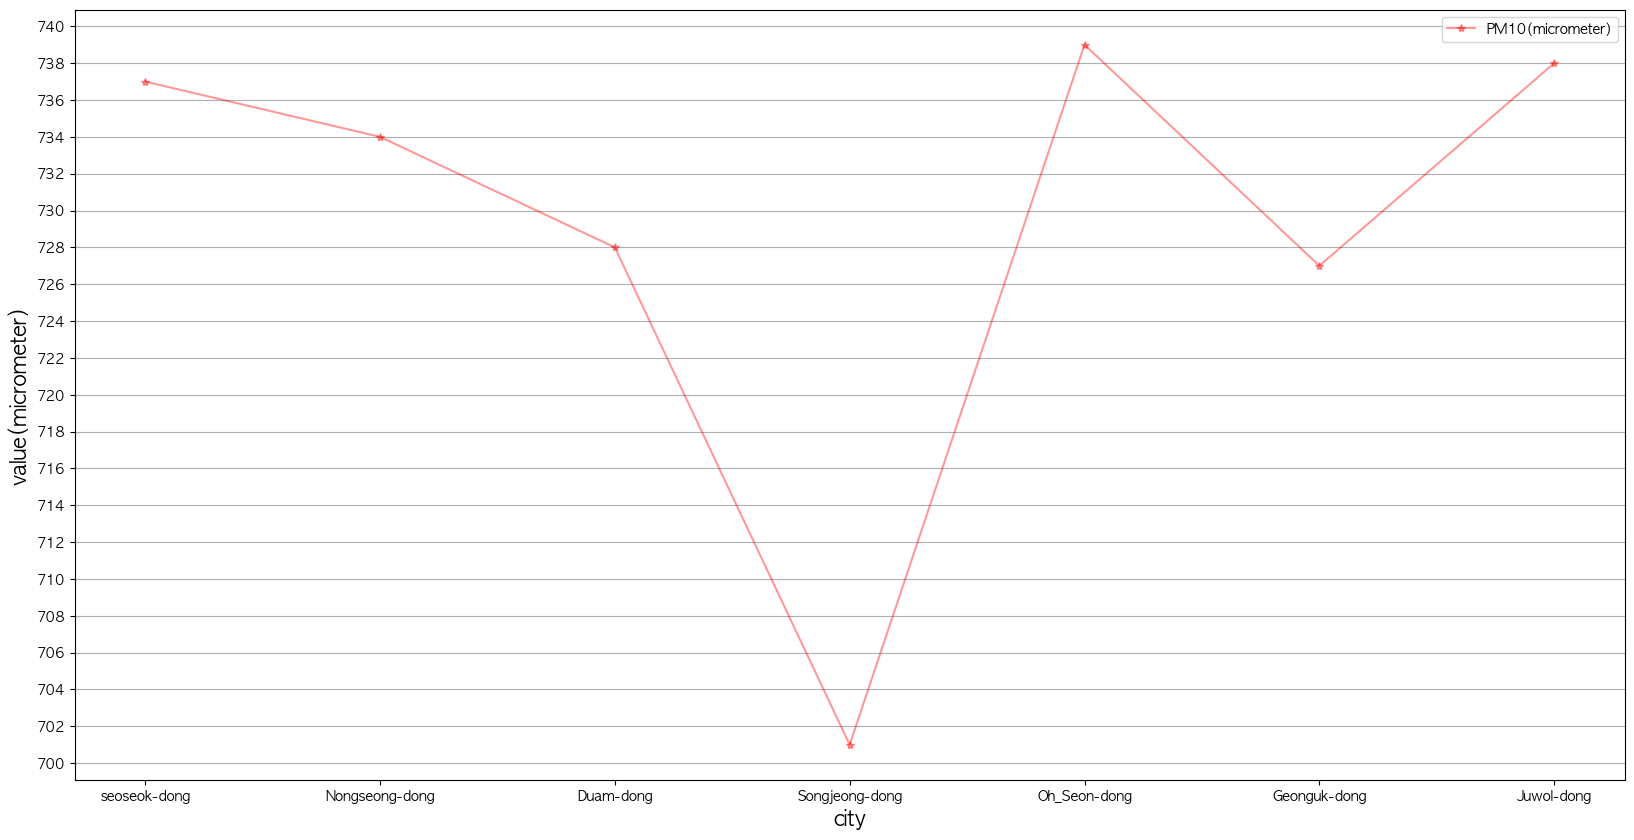

In [28]:
# y1_pm_data_set(미세먼지인 pm10측정값 시각화)
fig, ax = plt.subplots(figsize=(20,10))
bar_width = 0.15
index = np.arange(7)
city = ['seoseok-dong', 'Nongseong-dong', 'Duam-dong', 'Songjeong-dong', 'Oh_Seon-dong', 
        'Geonguk-dong', 'Juwol-dong']
plt.plot(city, y3_pm_data_set_1['PM10(micrometer)'], marker='*', alpha=0.4, color='red', label='PM10(micrometer)')


plt.xticks(city)
plt.yticks(np.arange(700, 742, 2))

# x축, y축 이름 및 범례 설정
plt.grid(True, axis='y')
plt.xlabel('city', size = 15)
plt.ylabel('value(micrometer)', size = 15)
plt.legend(loc='best')
plt.show()

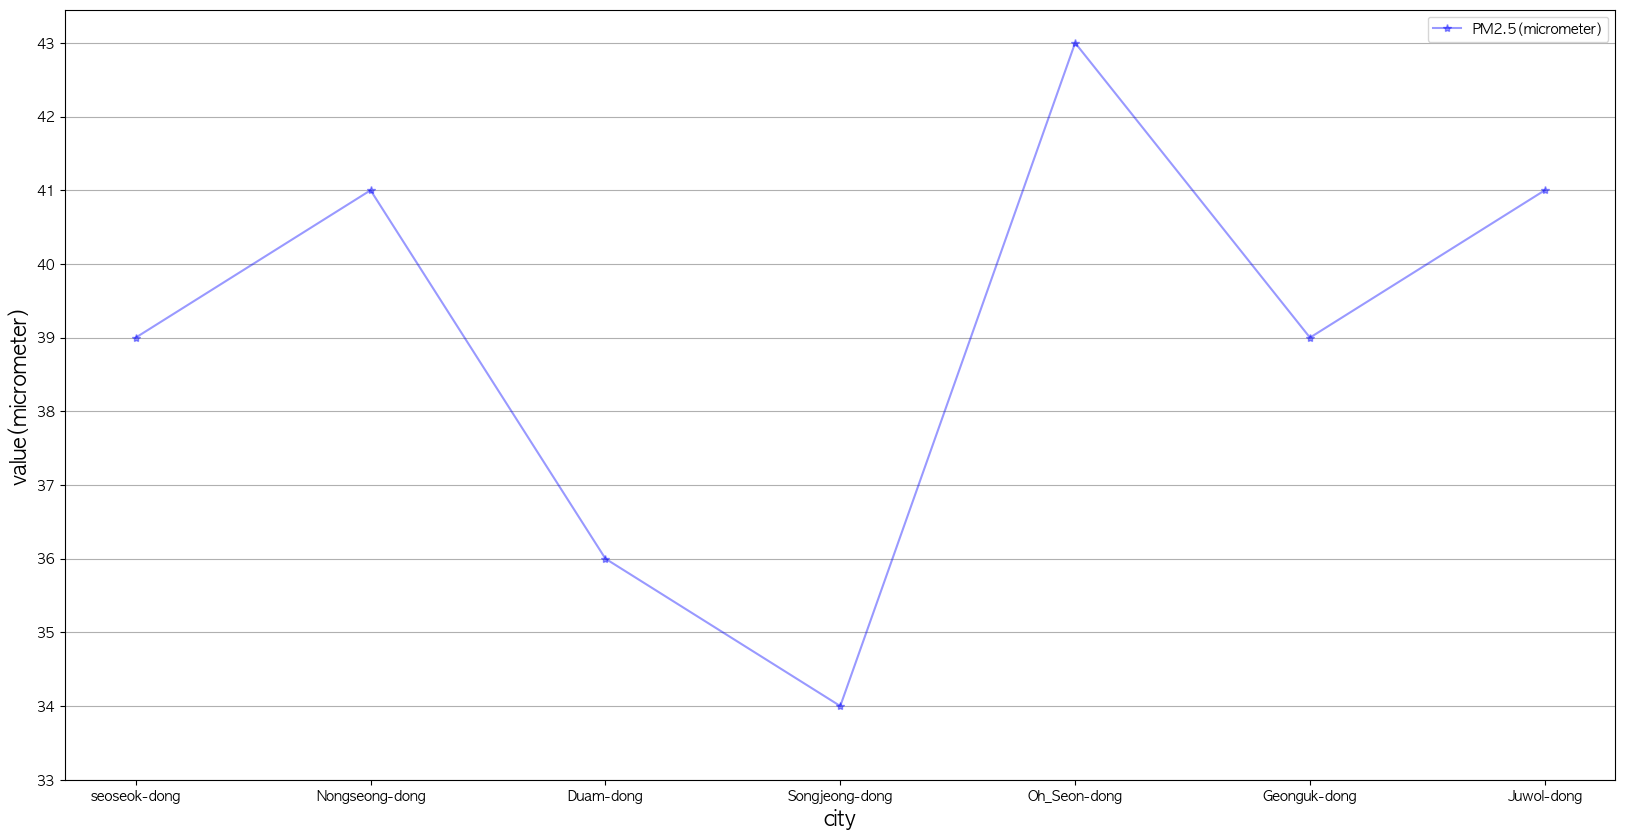

In [29]:
# y1_pm_data_set(초미세먼지인 pm2.5측정값 시각화)
fig, ax = plt.subplots(figsize=(20,10))
bar_width = 0.15
index = np.arange(7)
city = ['seoseok-dong', 'Nongseong-dong', 'Duam-dong', 'Songjeong-dong', 'Oh_Seon-dong', 
        'Geonguk-dong', 'Juwol-dong']
plt.plot(city, y3_pm_data_set_2['PM2.5(micrometer)'], marker='*', alpha=0.4, color='blue', label='PM2.5(micrometer)')

plt.xticks(city)
plt.yticks(np.arange(33, 44, 1))

# x축, y축 이름 및 범례 설정
plt.grid(True, axis='y')
plt.xlabel('city', size = 15)
plt.ylabel('value(micrometer)', size = 15)
plt.legend(loc='best')
plt.show()

#### 통계결과
#### 2019년 기준 3월이 측정값이 가장 높고, 특히 오선동 지역에 미세먼지 수치가 가장 높았다는 것을 알 수 있습니다
#### 미세먼지 수치가 높은 이유 : 중국발 스모그 유입과 대기 정체가 주요 원인이었습니다.
#### 광주 지역내에서는 오선동이 대기오염이 높은 이유가 지리적으로 봤을 때 
#### 산업단지 지역에 위치하고, 근거리에 호남고속도로가 관통하며, 하남산단 뒤편으로 진곡산단, 나대지가 산재해있기 때문에 
#### 대기 오염도가 심하다는 것을 알 수 있습니다.
-출처
[연합뉴스](https://www.yna.co.kr/view/AKR20190401068900004)
[광주드림](http://www.gjdream.com/news/articleView.html?idxno=494594)

#### 측정값에 따른 시계열 예측
#### 다양한 시계열 예측에 관한 모델종류가 많지만 최근 딥러닝 모델이 발전함에 따라 그중에 현재 데이터와 가장 적합한 LSTM 모델로 결정
#### 연도 별로 차이가 크지 않는 PM2.5(초미세먼지) 측정값을 예측
[LSTM](https://ko.wikipedia.org/wiki/%EC%9E%A5%EB%8B%A8%EA%B8%B0_%EB%A9%94%EB%AA%A8%EB%A6%AC)

In [30]:
# 예측확률을 높이기 위해 새로운 데이터 프레임 생성..

In [31]:
y1_pm_data_set = y1.loc[:,['month', 'city', 'dong', 'PM10(micrometer)', 'PM2.5(micrometer)']]
y2_pm_data_set = y2.loc[:,['month', 'city', 'dong', 'PM10(micrometer)', 'PM2.5(micrometer)']]
y4_pm_data_set = y4.loc[:,['month', 'city', 'dong', 'PM10(micrometer)', 'PM2.5(micrometer)']]
y5_pm_data_set = y5.loc[:,['month', 'city', 'dong', 'PM10(micrometer)', 'PM2.5(micrometer)']]

In [32]:
##y1_pm_totalC_data_set = y1_pm_data_set

#2017년 1월 미세먼지/초미세먼지 데이터
y1_pm10_1m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 1]['PM10(micrometer)'].sum()
y1_pm2_1m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 1]['PM2.5(micrometer)'].sum()

#2017년 2월 미세먼지/초미세먼지 데이터
y1_pm10_2m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 2]['PM10(micrometer)'].sum()
y1_pm2_2m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 2]['PM2.5(micrometer)'].sum()

#2017년 3월 미세먼지/초미세먼지 데이터
y1_pm10_3m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 3]['PM10(micrometer)'].sum()
y1_pm2_3m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 3]['PM2.5(micrometer)'].sum()

#2017년 4월 미세먼지/초미세먼지 데이터
y1_pm10_4m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 4]['PM10(micrometer)'].sum()
y1_pm2_4m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 4]['PM2.5(micrometer)'].sum()

#2017년 5월 미세먼지/초미세먼지 데이터
y1_pm10_5m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 5]['PM10(micrometer)'].sum()
y1_pm2_5m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 5]['PM2.5(micrometer)'].sum()

#2017년 6월 미세먼지/초미세먼지 데이터
y1_pm10_6m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 6]['PM10(micrometer)'].sum()
y1_pm2_6m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 6]['PM2.5(micrometer)'].sum()

#2017년 7월 미세먼지/초미세먼지 데이터
y1_pm10_7m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 7]['PM10(micrometer)'].sum()
y1_pm2_7m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 7]['PM2.5(micrometer)'].sum()

#2017년 8월 미세먼지/초미세먼지 데이터
y1_pm10_8m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 8]['PM10(micrometer)'].sum()
y1_pm2_8m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 8]['PM2.5(micrometer)'].sum()

#2017년 9월 미세먼지/초미세먼지 데이터
y1_pm10_9m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 9]['PM10(micrometer)'].sum()
y1_pm2_9m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 9]['PM2.5(micrometer)'].sum()

#2017년 10월 미세먼지/초미세먼지 데이터
y1_pm10_10m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 10]['PM10(micrometer)'].sum()
y1_pm2_10m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 10]['PM2.5(micrometer)'].sum()

#2017년 11월 미세먼지/초미세먼지 데이터
y1_pm10_11m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 11]['PM10(micrometer)'].sum()
y1_pm2_11m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 11]['PM2.5(micrometer)'].sum()

#2017년 12월 미세먼지/초미세먼지 데이터
y1_pm10_12m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 12]['PM10(micrometer)'].sum()
y1_pm2_12m_data_set = y1_pm_data_set[y1_pm_data_set['month'] == 12]['PM2.5(micrometer)'].sum()

# 2017년 월 통합 미세먼지/초미세먼지 데이터프레임 생성
i = [y1_pm10_1m_data_set, y1_pm10_2m_data_set, y1_pm10_3m_data_set, y1_pm10_4m_data_set, y1_pm10_5m_data_set,
    y1_pm10_6m_data_set, y1_pm10_7m_data_set, y1_pm10_8m_data_set, y1_pm10_9m_data_set, y1_pm10_10m_data_set,
    y1_pm10_11m_data_set, y1_pm10_12m_data_set]

j = [y1_pm2_1m_data_set, y1_pm2_2m_data_set, y1_pm2_3m_data_set, y1_pm2_4m_data_set, y1_pm2_5m_data_set,
    y1_pm2_6m_data_set, y1_pm2_7m_data_set, y1_pm2_8m_data_set, y1_pm2_9m_data_set, y1_pm2_10m_data_set,
    y1_pm2_11m_data_set, y1_pm2_12m_data_set]

month_y1 = ['Jan-2017', 'Feb-2017', 'Mar-2017', 'Apr-2017', 'May-2017', 'Jun-2017', 'Jul-2017', 
           'Aug-2017', 'Sep-2017', 'Oct-2017', 'Nov-2017', 'Dec-2017']

y1_pm10_pm2_data_set = pd.DataFrame({'date' : month_y1, 'PM10(micrometer)' : i, 'PM2.5(micrometer)' : j})

In [33]:
##y2_pm_totalC_data_set = y2_pm_data_set

#2018년 1월 미세먼지/초미세먼지 데이터
y2_pm10_1m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 1]['PM10(micrometer)'].sum()
y2_pm2_1m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 1]['PM2.5(micrometer)'].sum()

#2018년 2월 미세먼지/초미세먼지 데이터
y2_pm10_2m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 2]['PM10(micrometer)'].sum()
y2_pm2_2m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 2]['PM2.5(micrometer)'].sum()

#2018년 3월 미세먼지/초미세먼지 데이터
y2_pm10_3m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 3]['PM10(micrometer)'].sum()
y2_pm2_3m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 3]['PM2.5(micrometer)'].sum()

#2018년 4월 미세먼지/초미세먼지 데이터
y2_pm10_4m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 4]['PM10(micrometer)'].sum()
y2_pm2_4m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 4]['PM2.5(micrometer)'].sum()

#2018년 5월 미세먼지/초미세먼지 데이터
y2_pm10_5m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 5]['PM10(micrometer)'].sum()
y2_pm2_5m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 5]['PM2.5(micrometer)'].sum()

#2018년 6월 미세먼지/초미세먼지 데이터
y2_pm10_6m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 6]['PM10(micrometer)'].sum()
y2_pm2_6m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 6]['PM2.5(micrometer)'].sum()

#2018년 7월 미세먼지/초미세먼지 데이터
y2_pm10_7m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 7]['PM10(micrometer)'].sum()
y2_pm2_7m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 7]['PM2.5(micrometer)'].sum()

#2018년 8월 미세먼지/초미세먼지 데이터
y2_pm10_8m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 8]['PM10(micrometer)'].sum()
y2_pm2_8m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 8]['PM2.5(micrometer)'].sum()

#2018년 9월 미세먼지/초미세먼지 데이터
y2_pm10_9m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 9]['PM10(micrometer)'].sum()
y2_pm2_9m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 9]['PM2.5(micrometer)'].sum()

#2018년 10월 미세먼지/초미세먼지 데이터
y2_pm10_10m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 10]['PM10(micrometer)'].sum()
y2_pm2_10m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 10]['PM2.5(micrometer)'].sum()

#2018년 11월 미세먼지/초미세먼지 데이터
y2_pm10_11m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 11]['PM10(micrometer)'].sum()
y2_pm2_11m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 11]['PM2.5(micrometer)'].sum()

#2018년 12월 미세먼지/초미세먼지 데이터
y2_pm10_12m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 12]['PM10(micrometer)'].sum()
y2_pm2_12m_data_set = y2_pm_data_set[y2_pm_data_set['month'] == 12]['PM2.5(micrometer)'].sum()

# 2018년 월 통합 미세먼지/초미세먼지 데이터프레임 생성
k = [y2_pm10_1m_data_set, y2_pm10_2m_data_set, y2_pm10_3m_data_set, y2_pm10_4m_data_set, y2_pm10_5m_data_set,
    y2_pm10_6m_data_set, y2_pm10_7m_data_set, y2_pm10_8m_data_set, y2_pm10_9m_data_set, y2_pm10_10m_data_set,
    y2_pm10_11m_data_set, y2_pm10_12m_data_set]

l = [y2_pm2_1m_data_set, y2_pm2_2m_data_set, y2_pm2_3m_data_set, y2_pm2_4m_data_set, y2_pm2_5m_data_set,
    y2_pm2_6m_data_set, y2_pm2_7m_data_set, y2_pm2_8m_data_set, y2_pm2_9m_data_set, y2_pm2_10m_data_set,
    y2_pm2_11m_data_set, y2_pm2_12m_data_set]

month_y2 = ['Jan-2018', 'Feb-2018', 'Mar-2018', 'Apr-2018', 'May-2018', 'Jun-2018', 'Jul-2018', 
           'Aug-2018', 'Sep-2018', 'Oct-2018', 'Nov-2018', 'Dec-2018']

y2_pm10_pm2_data_set = pd.DataFrame({'date' : month_y2, 'PM10(micrometer)' : k, 'PM2.5(micrometer)' : l})

In [34]:
##y4_pm_totalC_data_set = y4_pm_data_set

#2020년 1월 미세먼지/초미세먼지 데이터
y4_pm10_1m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 1]['PM10(micrometer)'].sum()
y4_pm2_1m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 1]['PM2.5(micrometer)'].sum()

#2020년 2월 미세먼지/초미세먼지 데이터
y4_pm10_2m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 2]['PM10(micrometer)'].sum()
y4_pm2_2m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 2]['PM2.5(micrometer)'].sum()

#2020년 3월 미세먼지/초미세먼지 데이터
y4_pm10_3m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 3]['PM10(micrometer)'].sum()
y4_pm2_3m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 3]['PM2.5(micrometer)'].sum()

#2020년 4월 미세먼지/초미세먼지 데이터
y4_pm10_4m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 4]['PM10(micrometer)'].sum()
y4_pm2_4m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 4]['PM2.5(micrometer)'].sum()

#2020년 5월 미세먼지/초미세먼지 데이터
y4_pm10_5m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 5]['PM10(micrometer)'].sum()
y4_pm2_5m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 5]['PM2.5(micrometer)'].sum()

#2020년 6월 미세먼지/초미세먼지 데이터
y4_pm10_6m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 6]['PM10(micrometer)'].sum()
y4_pm2_6m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 6]['PM2.5(micrometer)'].sum()

#2020년 7월 미세먼지/초미세먼지 데이터
y4_pm10_7m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 7]['PM10(micrometer)'].sum()
y4_pm2_7m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 7]['PM2.5(micrometer)'].sum()

#2020년 8월 미세먼지/초미세먼지 데이터
y4_pm10_8m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 8]['PM10(micrometer)'].sum()
y4_pm2_8m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 8]['PM2.5(micrometer)'].sum()

#2020년 9월 미세먼지/초미세먼지 데이터
y4_pm10_9m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 9]['PM10(micrometer)'].sum()
y4_pm2_9m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 9]['PM2.5(micrometer)'].sum()

#2020년 10월 미세먼지/초미세먼지 데이터
y4_pm10_10m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 10]['PM10(micrometer)'].sum()
y4_pm2_10m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 10]['PM2.5(micrometer)'].sum()

#2020년 11월 미세먼지/초미세먼지 데이터
y4_pm10_11m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 11]['PM10(micrometer)'].sum()
y4_pm2_11m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 11]['PM2.5(micrometer)'].sum()

#2020년 12월 미세먼지/초미세먼지 데이터
y4_pm10_12m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 12]['PM10(micrometer)'].sum()
y4_pm2_12m_data_set = y4_pm_data_set[y4_pm_data_set['month'] == 12]['PM2.5(micrometer)'].sum()

# 2020년 월 통합 미세먼지/초미세먼지 데이터프레임 생성
m = [y4_pm10_1m_data_set, y4_pm10_2m_data_set, y4_pm10_3m_data_set, y4_pm10_4m_data_set, y4_pm10_5m_data_set,
    y4_pm10_6m_data_set, y4_pm10_7m_data_set, y4_pm10_8m_data_set, y4_pm10_9m_data_set, y4_pm10_10m_data_set,
    y4_pm10_11m_data_set, y4_pm10_12m_data_set]

n = [y4_pm2_1m_data_set, y4_pm2_2m_data_set, y4_pm2_3m_data_set, y4_pm2_4m_data_set, y4_pm2_5m_data_set,
    y4_pm2_6m_data_set, y4_pm2_7m_data_set, y4_pm2_8m_data_set, y4_pm2_9m_data_set, y4_pm2_10m_data_set,
    y4_pm2_11m_data_set, y4_pm2_12m_data_set]

month_y4 = ['Jan-2020', 'Feb-2020', 'Mar-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'Jul-2020', 
           'Aug-2020', 'Sep-2020', 'Oct-2020', 'Nov-2020', 'Dec-2020']

y4_pm10_pm2_data_set = pd.DataFrame({'date' : month_y4, 'PM10(micrometer)' : m, 'PM2.5(micrometer)' : n})

In [35]:
##y5_pm_totalC_data_set = y5_pm_data_set

#2021년 1월 미세먼지/초미세먼지 데이터
y5_pm10_1m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 1]['PM10(micrometer)'].sum()
y5_pm2_1m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 1]['PM2.5(micrometer)'].sum()

#2021년 2월 미세먼지/초미세먼지 데이터
y5_pm10_2m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 2]['PM10(micrometer)'].sum()
y5_pm2_2m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 2]['PM2.5(micrometer)'].sum()

#2021년 3월 미세먼지/초미세먼지 데이터
y5_pm10_3m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 3]['PM10(micrometer)'].sum()
y5_pm2_3m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 3]['PM2.5(micrometer)'].sum()

#2021년 4월 미세먼지/초미세먼지 데이터
y5_pm10_4m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 4]['PM10(micrometer)'].sum()
y5_pm2_4m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 4]['PM2.5(micrometer)'].sum()

#2021년 5월 미세먼지/초미세먼지 데이터
y5_pm10_5m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 5]['PM10(micrometer)'].sum()
y5_pm2_5m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 5]['PM2.5(micrometer)'].sum()

#2021년 6월 미세먼지/초미세먼지 데이터
y5_pm10_6m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 6]['PM10(micrometer)'].sum()
y5_pm2_6m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 6]['PM2.5(micrometer)'].sum()

#2021년 7월 미세먼지/초미세먼지 데이터
y5_pm10_7m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 7]['PM10(micrometer)'].sum()
y5_pm2_7m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 7]['PM2.5(micrometer)'].sum()

#2021년 8월 미세먼지/초미세먼지 데이터
y5_pm10_8m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 8]['PM10(micrometer)'].sum()
y5_pm2_8m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 8]['PM2.5(micrometer)'].sum()

#2021년 9월 미세먼지/초미세먼지 데이터
y5_pm10_9m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 9]['PM10(micrometer)'].sum()
y5_pm2_9m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 9]['PM2.5(micrometer)'].sum()

#2021년 10월 미세먼지/초미세먼지 데이터
y5_pm10_10m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 10]['PM10(micrometer)'].sum()
y5_pm2_10m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 10]['PM2.5(micrometer)'].sum()

#2021년 11월 미세먼지/초미세먼지 데이터
y5_pm10_11m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 11]['PM10(micrometer)'].sum()
y5_pm2_11m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 11]['PM2.5(micrometer)'].sum()

#2021년 12월 미세먼지/초미세먼지 데이터
y5_pm10_12m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 12]['PM10(micrometer)'].sum()
y5_pm2_12m_data_set = y5_pm_data_set[y5_pm_data_set['month'] == 12]['PM2.5(micrometer)'].sum()

# 2021년 월 통합 미세먼지/초미세먼지 데이터프레임 생성
o = [y5_pm10_1m_data_set, y5_pm10_2m_data_set, y5_pm10_3m_data_set, y5_pm10_4m_data_set, y5_pm10_5m_data_set,
    y5_pm10_6m_data_set, y5_pm10_7m_data_set, y5_pm10_8m_data_set, y5_pm10_9m_data_set, y5_pm10_10m_data_set,
    y5_pm10_11m_data_set, y5_pm10_12m_data_set]

p = [y5_pm2_1m_data_set, y5_pm2_2m_data_set, y5_pm2_3m_data_set, y5_pm2_4m_data_set, y5_pm2_5m_data_set,
    y5_pm2_6m_data_set, y5_pm2_7m_data_set, y5_pm2_8m_data_set, y5_pm2_9m_data_set, y5_pm2_10m_data_set,
    y5_pm2_11m_data_set, y5_pm2_12m_data_set]

month_y5 = ['Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021', 'May-2021', 'Jun-2021', 'Jul-2021', 
           'Aug-2021', 'Sep-2021', 'Oct-2021', 'Nov-2021', 'Dec-2021']

y5_pm10_pm2_data_set = pd.DataFrame({'date' : month_y5, 'PM10(micrometer)' : o, 'PM2.5(micrometer)' : p})

In [36]:
# 빠진 2019년도 데이터 프레임 새로 만들기
month_y3_re = ['Jan-2019', 'Feb-2019', 'Mar-2019', 'Apr-2019', 'May-2019', 'Jun-2019', 'Jul-2019', 
           'Aug-2019', 'Sep-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019']

y3_pm10_pm2_re_data_set = pd.DataFrame({'date' : month_y3_re, 'PM10(micrometer)' : g, 'PM2.5(micrometer)' : h})

In [37]:
print(y1_pm10_pm2_data_set)
print(y2_pm10_pm2_data_set)
print(y3_pm10_pm2_re_data_set)
print(y4_pm10_pm2_data_set)
print(y5_pm10_pm2_data_set)

        date  PM10(micrometer)  PM2.5(micrometer)
0   Jan-2017               327                214
1   Feb-2017               248                155
2   Mar-2017               342                222
3   Apr-2017               374                171
4   May-2017               395                160
5   Jun-2017               246                151
6   Jul-2017               167                103
7   Aug-2017               166                109
8   Sep-2017               237                156
9   Oct-2017               231                138
10  Nov-2017               352                216
11  Dec-2017               307                197
        date  PM10(micrometer)  PM2.5(micrometer)
0   Jan-2018               313                199
1   Feb-2018               352                215
2   Mar-2018               338                220
3   Apr-2018               394                172
4   May-2018               282                149
5   Jun-2018               286                186


In [38]:
# 테이블 합치기
pm10_pm2_all_data_set = pd.concat([y1_pm10_pm2_data_set,
                                  y2_pm10_pm2_data_set,
                                  y3_pm10_pm2_re_data_set,
                                  y4_pm10_pm2_data_set,
                                  y5_pm10_pm2_data_set])
pm10_pm2_all_data_set.head(10)

,date,PM10(micrometer),PM2.5(micrometer)
0,Jan-2017,327,214
1,Feb-2017,248,155
2,Mar-2017,342,222
3,Apr-2017,374,171
4,May-2017,395,160
5,Jun-2017,246,151
6,Jul-2017,167,103
7,Aug-2017,166,109
8,Sep-2017,237,156
9,Oct-2017,231,138


In [39]:
# 예측용 데이터프레임 백업
df = pm10_pm2_all_data_set

In [40]:
# 필요없는 컬럼 drop
df = df.drop('PM10(micrometer)', axis=1)
df.head(10)

,date,PM2.5(micrometer)
0,Jan-2017,214
1,Feb-2017,155
2,Mar-2017,222
3,Apr-2017,171
4,May-2017,160
5,Jun-2017,151
6,Jul-2017,103
7,Aug-2017,109
8,Sep-2017,156
9,Oct-2017,138


In [41]:
#pre_pm_data_set

            PM2.5(micrometer)
date                         
2017-01-31                214
2017-02-28                155
2017-03-31                222
2017-04-30                171
2017-05-31                160


<AxesSubplot: xlabel='date'>

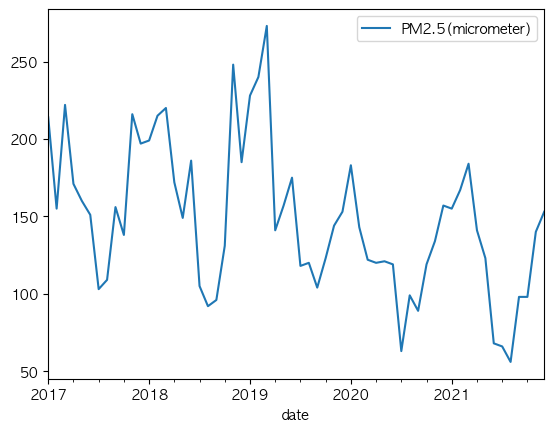

In [42]:
from pandas.tseries.offsets import MonthEnd

df['date'] = pd.to_datetime(df['date']) + MonthEnd(1)
df = df.set_index('date')
print(df.head())
df.plot()

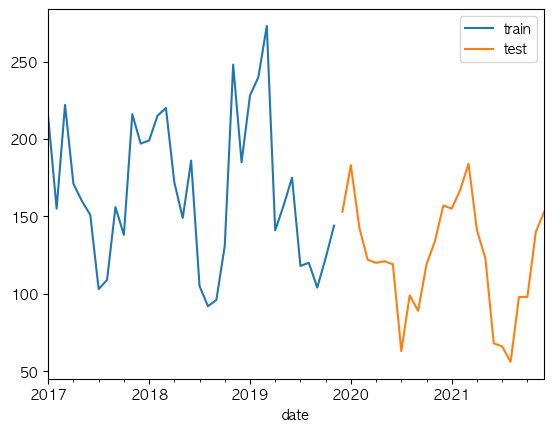

In [43]:
# 트레이닝셋 테스트셋 SPLIT
split_date = pd.Timestamp('12-01-2019')
# 2019/12/1 까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 한다.

train = df.loc[:split_date, ['PM2.5(micrometer)']]
test = df.loc[split_date:, ['PM2.5(micrometer)']]


ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [44]:
# 변수 Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[0.67403315],
       [0.3480663 ],
       [0.71823204],
       [0.43646409],
       [0.37569061],
       [0.32596685],
       [0.06077348],
       [0.09392265],
       [0.35359116],
       [0.25414365],
       [0.68508287],
       [0.5801105 ],
       [0.59116022],
       [0.67955801],
       [0.70718232],
       [0.44198895],
       [0.31491713],
       [0.51933702],
       [0.0718232 ],
       [0.        ],
       [0.02209945],
       [0.21546961],
       [0.86187845],
       [0.51381215],
       [0.75138122],
       [0.81767956],
       [1.        ],
       [0.27071823],
       [0.35911602],
       [0.45856354],
       [0.14364641],
       [0.15469613],
       [0.06629834],
       [0.17127072],
       [0.28729282]])

In [45]:
# Pandas Dataframe으로 변환
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
date,
2017-01-31,0.674033
2017-02-28,0.348066
2017-03-31,0.718232
2017-04-30,0.436464
2017-05-31,0.375691


In [46]:
# pandas shift를 통해 Window 만들기
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
2017-01-31,0.674033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28,0.348066,0.674033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31,0.718232,0.348066,0.674033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30,0.436464,0.718232,0.348066,0.674033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31,0.375691,0.436464,0.718232,0.348066,0.674033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-30,0.325967,0.375691,0.436464,0.718232,0.348066,0.674033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-31,0.060773,0.325967,0.375691,0.436464,0.718232,0.348066,0.674033,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-31,0.093923,0.060773,0.325967,0.375691,0.436464,0.718232,0.348066,0.674033,NaN,NaN,NaN,NaN,NaN
2017-09-30,0.353591,0.093923,0.060773,0.325967,0.375691,0.436464,0.718232,0.348066,0.674033,NaN,NaN,NaN,NaN


In [47]:
# 트레이닝셋과 테스트셋 만들기
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [48]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,
2018-01-31,0.580110,0.685083,0.254144,0.353591,0.093923,0.060773,0.325967,0.375691,0.436464,0.718232,0.348066,0.674033
2018-02-28,0.591160,0.580110,0.685083,0.254144,0.353591,0.093923,0.060773,0.325967,0.375691,0.436464,0.718232,0.348066
2018-03-31,0.679558,0.591160,0.580110,0.685083,0.254144,0.353591,0.093923,0.060773,0.325967,0.375691,0.436464,0.718232
2018-04-30,0.707182,0.679558,0.591160,0.580110,0.685083,0.254144,0.353591,0.093923,0.060773,0.325967,0.375691,0.436464
2018-05-31,0.441989,0.707182,0.679558,0.591160,0.580110,0.685083,0.254144,0.353591,0.093923,0.060773,0.325967,0.375691


In [49]:
y_train.head()

,Scaled
date,
2018-01-31,0.591160
2018-02-28,0.679558
2018-03-31,0.707182
2018-04-30,0.441989
2018-05-31,0.314917


In [50]:
# 다시 ndarray로 변환하기
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)

(23, 12)
[[0.5801105  0.68508287 0.25414365 0.35359116 0.09392265 0.06077348
  0.32596685 0.37569061 0.43646409 0.71823204 0.3480663  0.67403315]
 [0.59116022 0.5801105  0.68508287 0.25414365 0.35359116 0.09392265
  0.06077348 0.32596685 0.37569061 0.43646409 0.71823204 0.3480663 ]
 [0.67955801 0.59116022 0.5801105  0.68508287 0.25414365 0.35359116
  0.09392265 0.06077348 0.32596685 0.37569061 0.43646409 0.71823204]
 [0.70718232 0.67955801 0.59116022 0.5801105  0.68508287 0.25414365
  0.35359116 0.09392265 0.06077348 0.32596685 0.37569061 0.43646409]
 [0.44198895 0.70718232 0.67955801 0.59116022 0.5801105  0.68508287
  0.25414365 0.35359116 0.09392265 0.06077348 0.32596685 0.37569061]
 [0.31491713 0.44198895 0.70718232 0.67955801 0.59116022 0.5801105
  0.68508287 0.25414365 0.35359116 0.09392265 0.06077348 0.32596685]
 [0.51933702 0.31491713 0.44198895 0.70718232 0.67955801 0.59116022
  0.5801105  0.68508287 0.25414365 0.35359116 0.09392265 0.06077348]
 [0.0718232  0.51933702 0.3149171

In [51]:
# 최종 트레이닝셋과 테스트셋의 X 만들기
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(23, 12, 1)
[[[0.5801105 ]
  [0.68508287]
  [0.25414365]
  [0.35359116]
  [0.09392265]
  [0.06077348]
  [0.32596685]
  [0.37569061]
  [0.43646409]
  [0.71823204]
  [0.3480663 ]
  [0.67403315]]

 [[0.59116022]
  [0.5801105 ]
  [0.68508287]
  [0.25414365]
  [0.35359116]
  [0.09392265]
  [0.06077348]
  [0.32596685]
  [0.37569061]
  [0.43646409]
  [0.71823204]
  [0.3480663 ]]

 [[0.67955801]
  [0.59116022]
  [0.5801105 ]
  [0.68508287]
  [0.25414365]
  [0.35359116]
  [0.09392265]
  [0.06077348]
  [0.32596685]
  [0.37569061]
  [0.43646409]
  [0.71823204]]

 [[0.70718232]
  [0.67955801]
  [0.59116022]
  [0.5801105 ]
  [0.68508287]
  [0.25414365]
  [0.35359116]
  [0.09392265]
  [0.06077348]
  [0.32596685]
  [0.37569061]
  [0.43646409]]

 [[0.44198895]
  [0.70718232]
  [0.67955801]
  [0.59116022]
  [0.5801105 ]
  [0.68508287]
  [0.25414365]
  [0.35359116]
  [0.09392265]
  [0.06077348]
  [0.32596685]
  [0.37569061]]

 [[0.31491713]
  [0.44198895]
  [0.70718232]
  [0.67955801]
  [0.59116

In [52]:
# LSTM 모델 만들기
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

K.clear_session()
model = Sequential() # Sequeatial Model
model.add(LSTM(1024, input_shape=(12, 1))) # (timestep, feature)
model.add(Dense(2048))
model.add(Dense(512))
model.add(Dense(128))
model.add(Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()

2022-12-06 03:36:09.062060: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 03:36:14.240128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1024)              4202496   
                                                                 
 dense (Dense)               (None, 2048)              2099200   
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7,416,577
Trainable params: 7,416,577
Non-trainable params: 0
_________________________________________________________________


In [53]:
# 모델 시각화(사용할 땐 주석 제거)
#from keras import layers, models
#from tensorflow.keras.utils import plot_model

#plot_model(model, show_shapes=True, to_file='pre_model.png')

In [57]:
# model Fitting
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=10,
          batch_size=1, verbose=1, callbacks=[early_stop], validation_split=0.2)

Epoch 1/10
18/18 [==============================] - 4s 208ms/step - loss: 0.0642 - accuracy: 0.1111 - val_loss: 0.0836 - val_accuracy: 0.0000e+00
Epoch 2/10
18/18 [==============================] - 4s 198ms/step - loss: 0.0387 - accuracy: 0.1111 - val_loss: 0.1077 - val_accuracy: 0.0000e+00
Epoch 3/10
18/18 [==============================] - 4s 206ms/step - loss: 0.0382 - accuracy: 0.1111 - val_loss: 0.1605 - val_accuracy: 0.0000e+00
Epoch 4/10
18/18 [==============================] - 4s 197ms/step - loss: 0.0335 - accuracy: 0.1111 - val_loss: 0.1301 - val_accuracy: 0.0000e+00
Epoch 5/10
18/18 [==============================] - 3s 192ms/step - loss: 0.0332 - accuracy: 0.1111 - val_loss: 0.0885 - val_accuracy: 0.0000e+00
Epoch 6/10
18/18 [==============================] - 3s 193ms/step - loss: 0.0228 - accuracy: 0.1111 - val_loss: 0.1088 - val_accuracy: 0.0000e+00
Epoch 7/10
18/18 [==============================] - 4s 200ms/step - loss: 0.0277 - accuracy: 0.1111 - val_loss: 0.1094 - val

In [58]:
# 학습된 모델을 통해 테스트셋 Test 하기
print(X_test_t)
y_pred = model.predict(X_test_t)




y_pred_df = pd.DataFrame(y_pred, columns=['prediction'], index=test.index[:-12])

y_pred_df.plot(ax=ax)
plt.show()
print(y_pred)

[[[ 0.2320442 ]
  [ 0.14917127]
  [-0.01657459]
  [ 0.03867403]
  [-0.16022099]
  [ 0.14917127]
  [ 0.16022099]
  [ 0.15469613]
  [ 0.16574586]
  [ 0.28176796]
  [ 0.50276243]
  [ 0.33701657]]

 [[ 0.35911602]
  [ 0.2320442 ]
  [ 0.14917127]
  [-0.01657459]
  [ 0.03867403]
  [-0.16022099]
  [ 0.14917127]
  [ 0.16022099]
  [ 0.15469613]
  [ 0.16574586]
  [ 0.28176796]
  [ 0.50276243]]

 [[ 0.3480663 ]
  [ 0.35911602]
  [ 0.2320442 ]
  [ 0.14917127]
  [-0.01657459]
  [ 0.03867403]
  [-0.16022099]
  [ 0.14917127]
  [ 0.16022099]
  [ 0.15469613]
  [ 0.16574586]
  [ 0.28176796]]

 [[ 0.41436464]
  [ 0.3480663 ]
  [ 0.35911602]
  [ 0.2320442 ]
  [ 0.14917127]
  [-0.01657459]
  [ 0.03867403]
  [-0.16022099]
  [ 0.14917127]
  [ 0.16022099]
  [ 0.15469613]
  [ 0.16574586]]

 [[ 0.50828729]
  [ 0.41436464]
  [ 0.3480663 ]
  [ 0.35911602]
  [ 0.2320442 ]
  [ 0.14917127]
  [-0.01657459]
  [ 0.03867403]
  [-0.16022099]
  [ 0.14917127]
  [ 0.16022099]
  [ 0.15469613]]

 [[ 0.27071823]
  [ 0.50828729

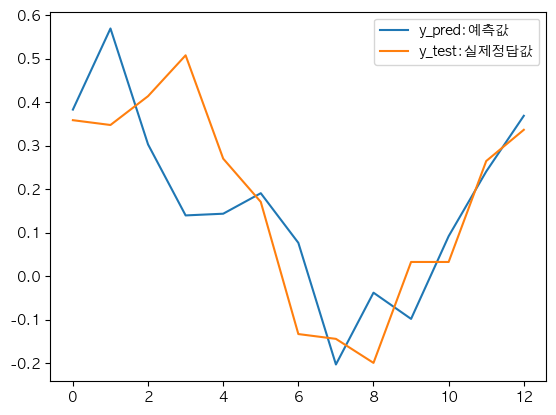

In [59]:
# 모델 검증 시각화

plt.figure()
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['y_pred:예측값','y_test:실제정답값'], loc='best')